# Sales

In [175]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [176]:
basepath = r'C:\Clarenti\Data\Project\Data\Analysis\Projects\Marketing Analytics/datasets'

In [177]:
orders_file = r'/orders.csv'

In [178]:
df = pd.read_csv(basepath + orders_file)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   customer_id    9994 non-null   object 
 2   postal_code    9994 non-null   int64  
 3   product_id     9994 non-null   object 
 4   sales          9994 non-null   float64
 5   quantity       9994 non-null   int64  
 6   discount       9994 non-null   float64
 7   profit         9994 non-null   float64
 8   category       9994 non-null   object 
 9   subcategory    9994 non-null   object 
 10  product_name   9994 non-null   object 
 11  order_date     9994 non-null   object 
 12  ship_date      9994 non-null   object 
 13  ship_mode      9994 non-null   object 
 14  customer_name  9994 non-null   object 
 15  segment        9994 non-null   object 
 16  country        9994 non-null   object 
 17  city           9994 non-null   object 
 18  state   

In [180]:
df.head(5)

,order_id,customer_id,postal_code,product_id,sales,quantity,discount,profit,category,subcategory,product_name,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [181]:
df.postal_code = df.postal_code.astype(str)

<Axes: >

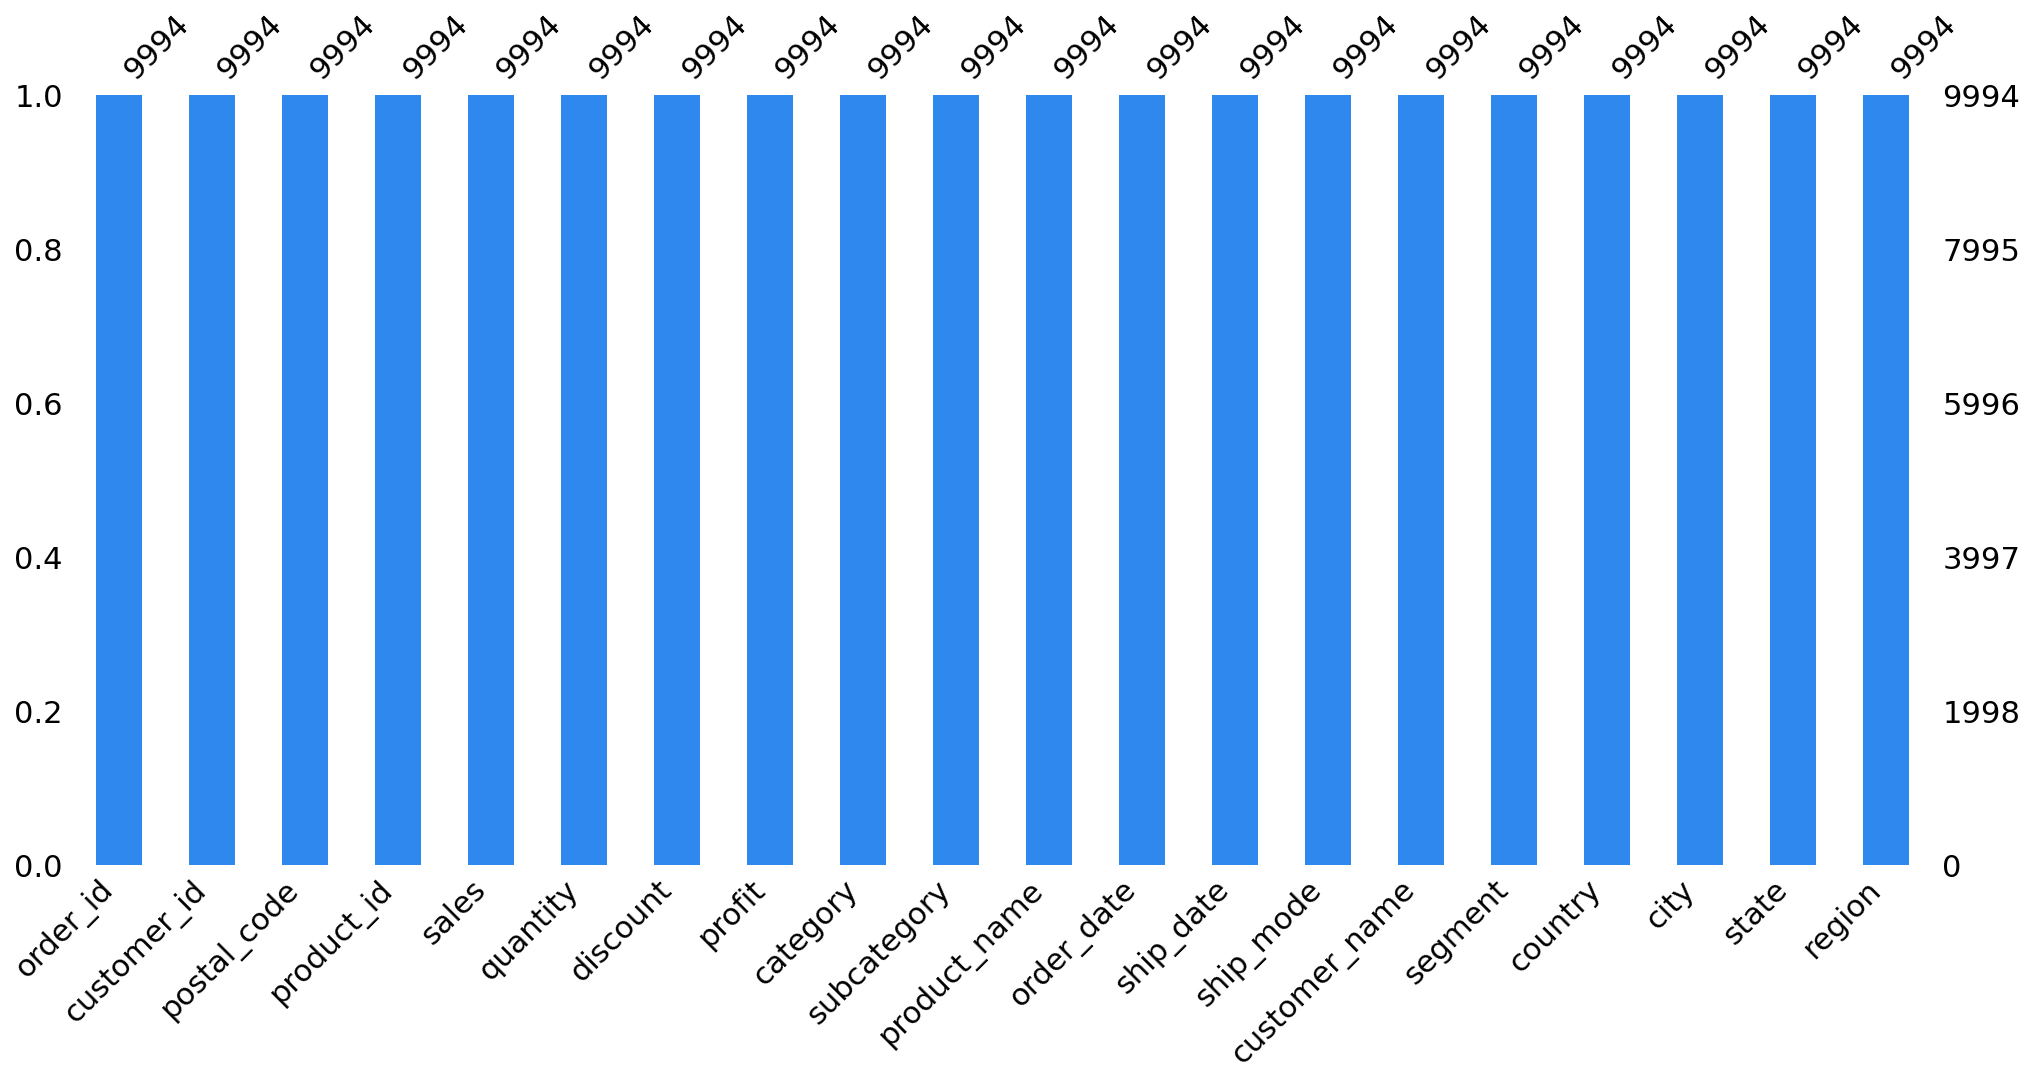

In [182]:
msno.bar(df, fontsize=22, color='#2f88ed')

In [183]:
select_cols = ['category', 'ship_mode', 'segment', 'country', 'region']
list_item = []
for i in df.loc[:, select_cols].columns:
    list_item.append([i, df[i].nunique(), df[i].drop_duplicates().values])

pd.DataFrame(data=list_item, columns=['features', 'n-unique', 'unique_vals'])

,features,n-unique,unique_vals
0,category,3,"[Furniture, Office Supplies, Technology]"
1,ship_mode,4,"[Second Class, Standard Class, First Class, Sa..."
2,segment,3,"[Consumer, Corporate, Home Office]"
3,country,1,[United States]
4,region,4,"[South, West, Central, East]"


### Insight I

In [184]:
df_insight = df.copy()

#### Region

<Axes: xlabel='segment', ylabel='count'>

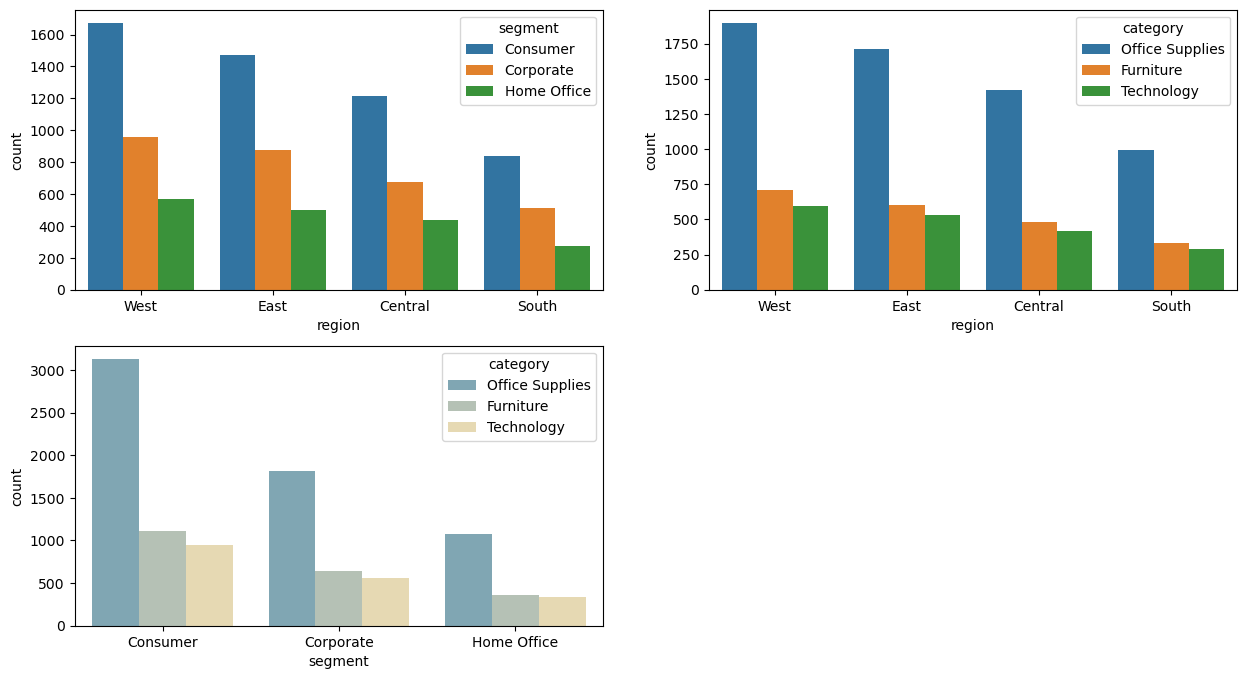

In [185]:
fig = plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.2)
fig.add_subplot(2, 2, 1)
sns.countplot(data=df_insight, x='region', hue='segment', order=df_insight.region.value_counts().index)
fig.add_subplot(2, 2, 2)
sns.countplot(data=df_insight, x='region', hue='category', order=df_insight.region.value_counts().index,
    hue_order=df_insight.category.value_counts().index)
fig.add_subplot(2, 2, 3)
sns.countplot(data=df_insight, x='segment', hue='category', order=df_insight.segment.value_counts().index,
    hue_order=df_insight.category.value_counts().index, palette='blend:#7AB,#EDA')

In [186]:
df_west = df_insight[df_insight.region == 'West']

##### [West] Segment Across Category

In [187]:
df_west.segment.value_counts().values[1]

960

Text(0.5, 1.0, 'Region (West) Across Customer Segments In Categories')

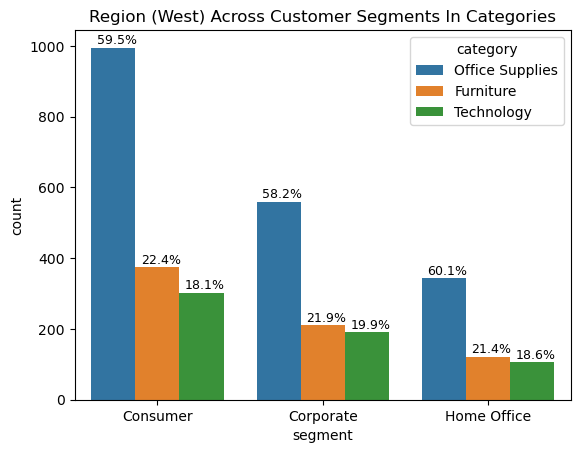

In [188]:
ax = sns.countplot(data=df_west, x='segment', hue='category', order=df_west.segment.value_counts().index)

segs = df_west.segment.nunique()
cats = df_west.category.nunique()

_bars = [p for p in ax.patches] 
h_bars = [p.get_height() for p in ax.patches]
for i in range(segs):
    total_values = df_west['segment'].value_counts().values[i]
    for j in range(cats):
        percent = '{:.1f}%'.format(100 * h_bars[(j*segs + i)]/total_values)
        x = _bars[(j*segs + i)].get_x() + _bars[(j*segs + i)].get_width() / 2 - 0.1
        y = _bars[(j*segs + i)].get_y() + _bars[(j*segs + i)].get_height() + 10.5
        ax.annotate(percent, (x, y), size = 9)
plt.title('Region (West) Across Customer Segments In Categories')

##### [West] States

Text(0.5, 1.0, 'Region (West) Across Customer Segments In States Rate')

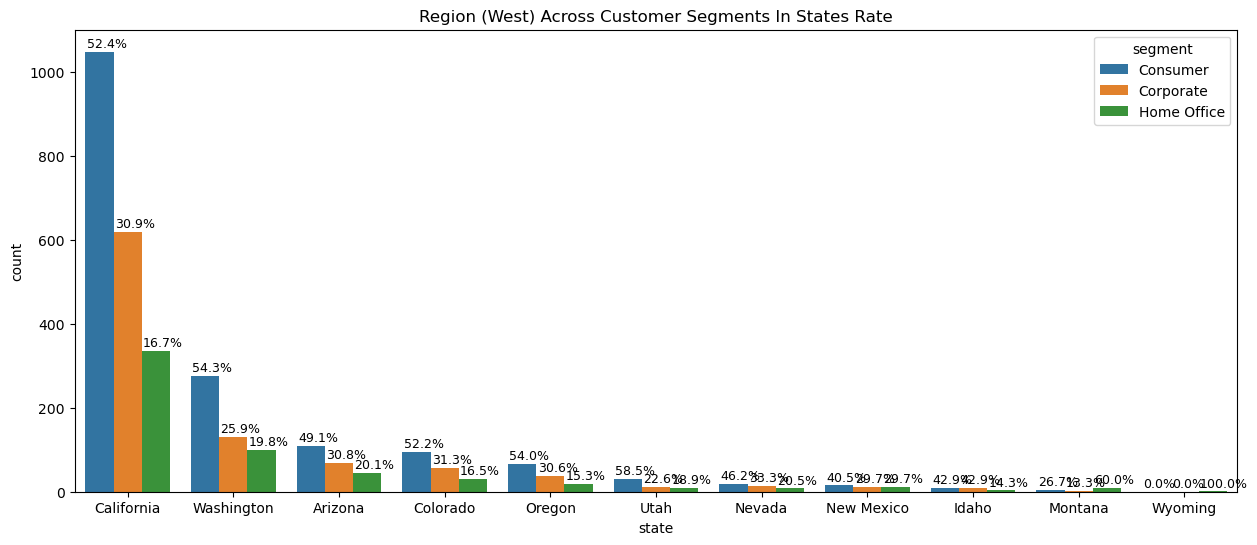

In [219]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(ax= ax, data=df_west, x='state', hue='segment', order=df_west.state.value_counts().index, hue_order=df_west.segment.value_counts().index)

_bars = [p for p in ax.patches]
h_bars = [p.get_height() for p in ax.patches]

states_uniq = df_west.state.nunique()
segment_uniq = df_west.segment.nunique()
for i in range(states_uniq):
    total_values = df_west['state'].value_counts().values[i]
    for j in range(segment_uniq):
        val = '{:.1f}%'.format(100* h_bars[(j*states_uniq + i)]/total_values)
        x = _bars[(j*states_uniq + i)].get_x() + _bars[(j*states_uniq + i)].get_width() / 2 - 0.12
        y = _bars[(j*states_uniq + i)].get_y() + _bars[(j*states_uniq + i)].get_height() + 10.5
        ax.annotate(val, (x, y), size = 9)
plt.title('Region (West) Across Customer Segments In States Rate')


[(0.0, 200.0)]

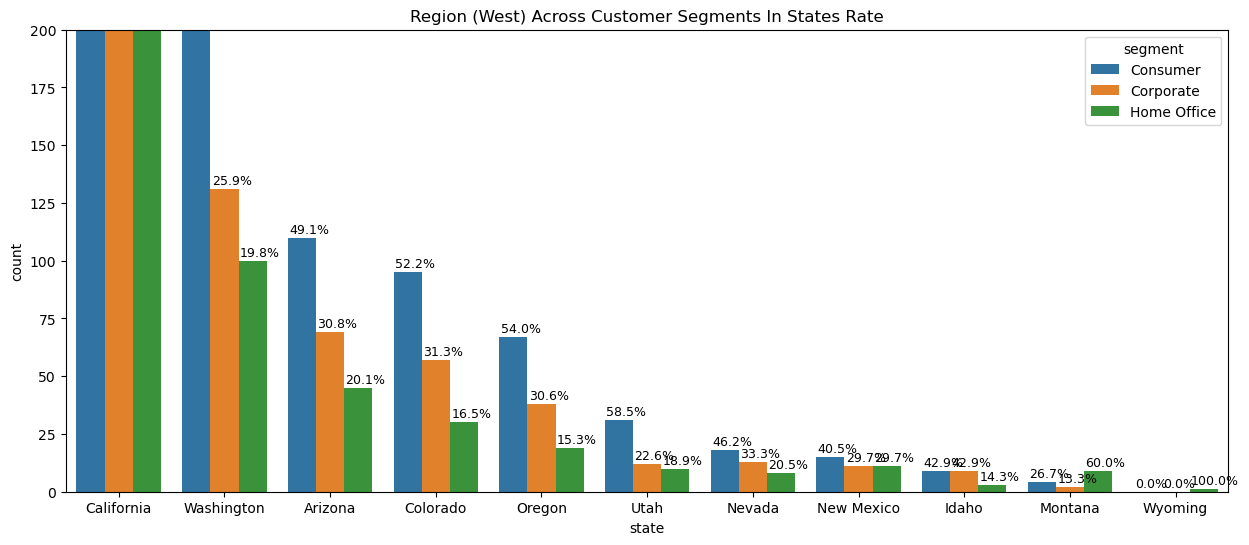

In [218]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(ax= ax, data=df_west, x='state', hue='segment', order=df_west.state.value_counts().index, hue_order=df_west.segment.value_counts().index)

_bars = [p for p in ax.patches]
h_bars = [p.get_height() for p in ax.patches]

states_uniq = df_west.state.nunique()
segment_uniq = df_west.segment.nunique()
for i in range(states_uniq):
    total_values = df_west['state'].value_counts().values[i]
    for j in range(segment_uniq):
        val = '{:.1f}%'.format(100*h_bars[(j*states_uniq + i)]/total_values)
        x = _bars[(j*states_uniq + i)].get_x() + _bars[(j*states_uniq + i)].get_width() / 2 - 0.12
        y = _bars[(j*states_uniq + i)].get_y() + _bars[(j*states_uniq + i)].get_height() + 2
        ax.annotate(val, (x, y), size = 9)
plt.title('Region (West) Across Customer Segments In States Rate')
ax.set(ylim=(0,200))

Text(0.5, 1.0, 'Region (West) Across Categories In States Rate(%)')

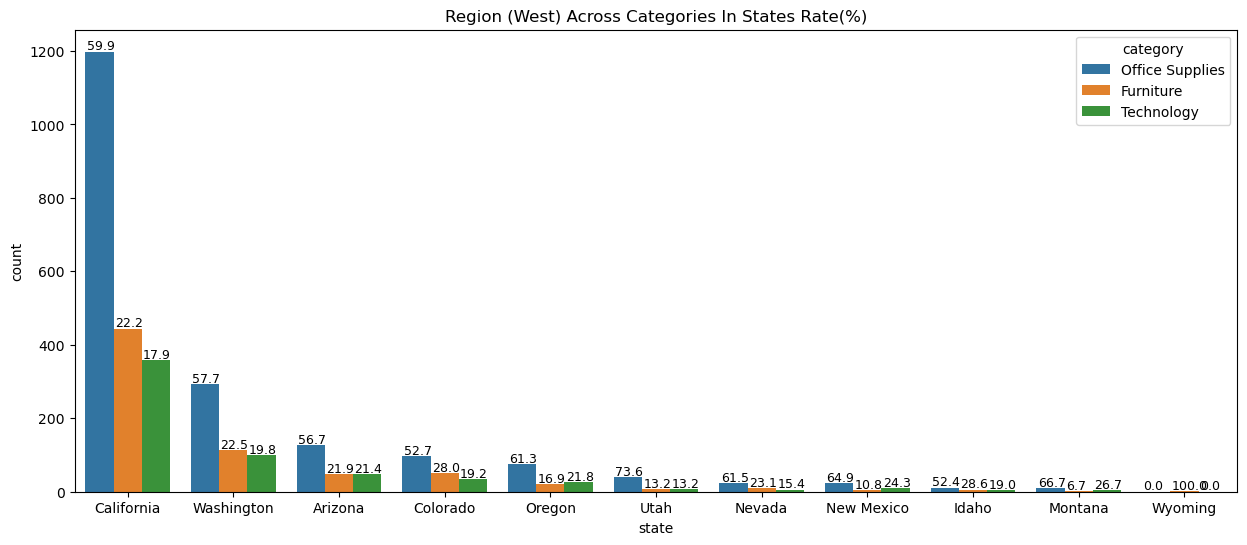

In [212]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(data=df_west, x='state', hue='category', order=df_west.state.value_counts().index)

_bars = [p for p in ax.patches]
h_bars = [p.get_height() for p in ax.patches]

states_uniq = df_west.state.nunique()
cats_uniq = df_west.category.nunique()
for i in range(states_uniq):
    total_values = df_west['state'].value_counts().values[i]
    for j in range(cats_uniq):
        val = '{:.1f}'.format(100*h_bars[(j*states_uniq + i)]/total_values)
        x = _bars[(j*states_uniq + i)].get_x() + _bars[(j*states_uniq + i)].get_width() / 2 - 0.12
        y = _bars[(j*states_uniq + i)].get_y() + _bars[(j*states_uniq + i)].get_height() + 5
        ax.annotate(val, (x, y), size = 9)
plt.title('Region (West) Across Categories In States Rate(%)')

# fig.show()

##### [South] Segment Across Category

In [192]:
df_south = df_insight[df_insight.region == 'South']

Text(0.5, 1.0, 'Region (South) Across Customer Segments In Categories')

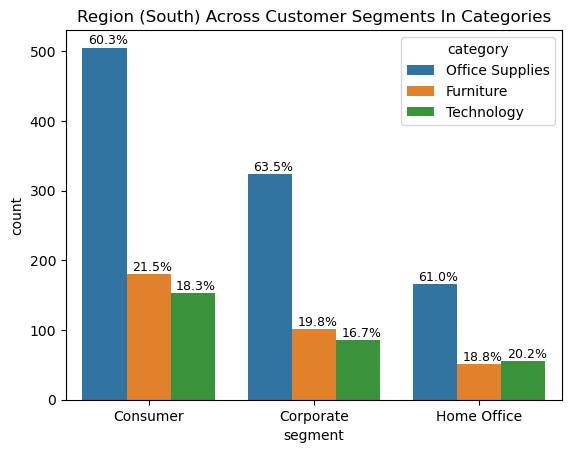

In [199]:
ax = sns.countplot(data=df_south, x='segment', hue='category', order=df_south.segment.value_counts().index, hue_order=df_south.category.value_counts().index)

segs = df_south.segment.nunique()
cats = df_south.category.nunique()

_bars = [p for p in ax.patches] 
h_bars = [p.get_height() for p in ax.patches]
for i in range(segs):
    total_values = df_south['segment'].value_counts().values[i]
    for j in range(cats):
        percent = '{:.1f}%'.format(100 * h_bars[(j*segs + i)]/total_values)
        x = _bars[(j*segs + i)].get_x() + _bars[(j*segs + i)].get_width() / 2 - 0.1
        y = _bars[(j*segs + i)].get_y() + _bars[(j*segs + i)].get_height() + 5
        ax.annotate(percent, (x, y), size = 9)
plt.title('Region (South) Across Customer Segments In Categories')

##### [South] States

Text(0.5, 1.0, 'Region (South) Across Customer Segments In States Rate')

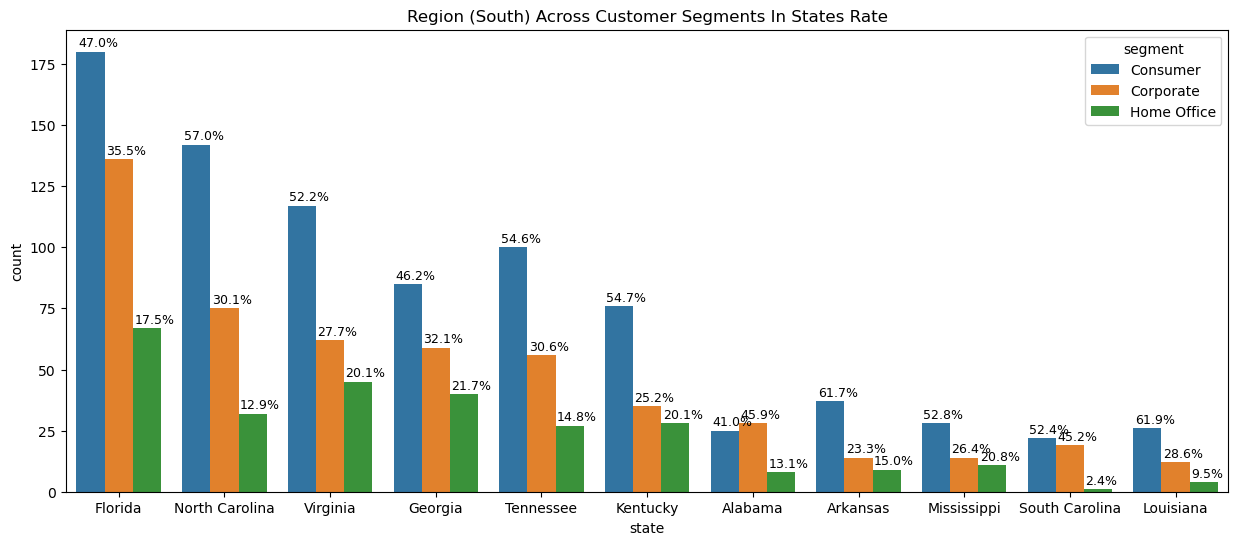

In [217]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(ax= ax, data=df_south, x='state', hue='segment', order=df_south.state.value_counts().index, hue_order=df_south.segment.value_counts().index)

_bars = [p for p in ax.patches]
h_bars = [p.get_height() for p in ax.patches]

states_uniq = df_south.state.nunique()
segment_uniq = df_south.segment.nunique()
for i in range(states_uniq):
    total_values = df_south['state'].value_counts().values[i]
    for j in range(segment_uniq):
        val = '{:.1f}%'.format(100*h_bars[(j*states_uniq + i)]/total_values)
        x = _bars[(j*states_uniq + i)].get_x() + _bars[(j*states_uniq + i)].get_width() / 2 - 0.12
        y = _bars[(j*states_uniq + i)].get_y() + _bars[(j*states_uniq + i)].get_height() + 2
        ax.annotate(val, (x, y), size = 9)
plt.title('Region (South) Across Customer Segments In States Rate')


Text(0.5, 1.0, 'Region (South) Across Categories In States Rate')

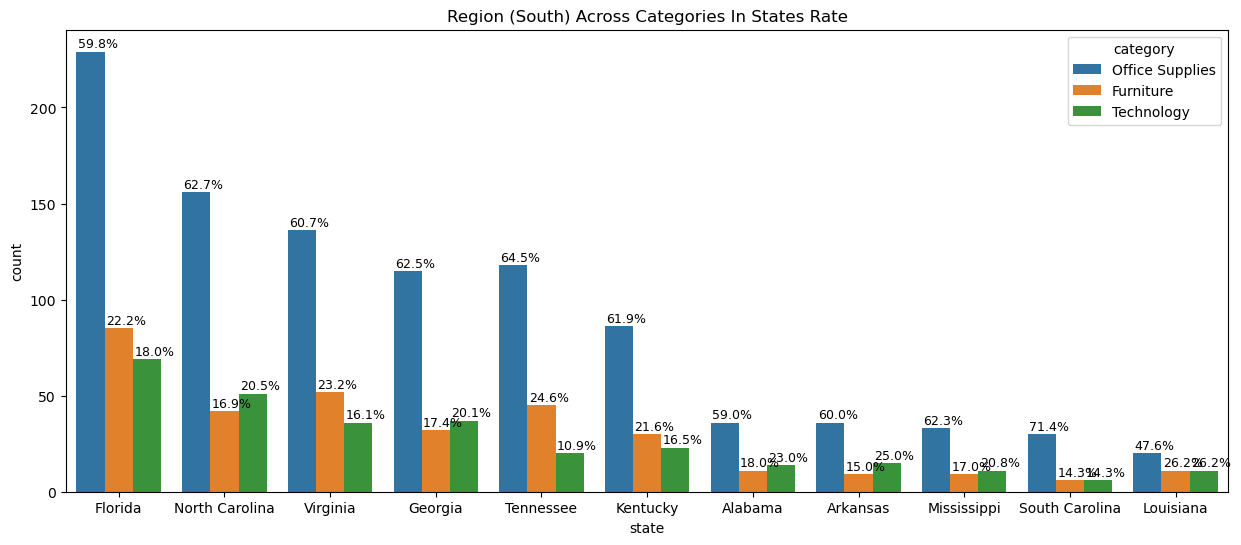

In [216]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(data=df_south, x='state', hue='category', order=df_south.state.value_counts().index, hue_order=df_south.category.value_counts().index)

_bars = [p for p in ax.patches]
h_bars = [p.get_height() for p in ax.patches]

states_uniq = df_south.state.nunique()
cats_uniq = df_south.category.nunique()
for i in range(states_uniq):
    total_values = df_south['state'].value_counts().values[i]
    for j in range(cats_uniq):
        val = '{:.1f}%'.format(100*h_bars[(j*states_uniq + i)]/total_values)
        x = _bars[(j*states_uniq + i)].get_x() + _bars[(j*states_uniq + i)].get_width() / 2 - 0.12
        y = _bars[(j*states_uniq + i)].get_y() + _bars[(j*states_uniq + i)].get_height() + 2
        ax.annotate(val, (x, y), size = 9)
plt.title('Region (South) Across Categories In States Rate')

# fig.show()